In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [ ]:
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

In [ ]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [ ]:
# 학습, 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.2,
                                                    shuffle=True, random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=num_input))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1792      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

In [ ]:
# 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 11.6182 - mae: 2.5267


[11.618229866027832, 2.526672601699829]

In [ ]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25,
                    verbose=2)

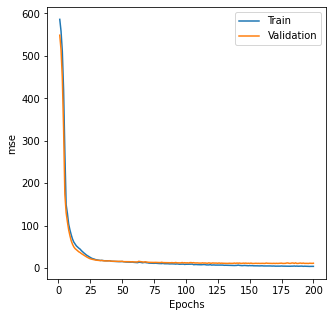

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
  plt.figure(figsize=(5, 5))
  plt.plot(range(start, total_epoch + 1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch + 1),
           history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()

plot_loss_curve(total_epoch=200, start=1)

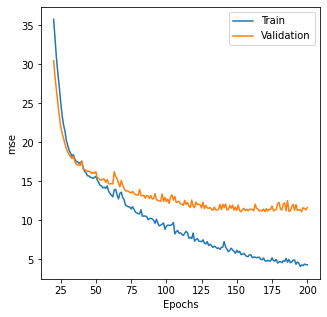

In [ ]:
plot_loss_curve(total_epoch=200, start=20)